In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [ ]:
# Load the Dataset

In [2]:
data = pd.read_csv("Alphabets_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
# Explore Class Distribution

In [8]:
class_distribution = data['letter'].value_counts()

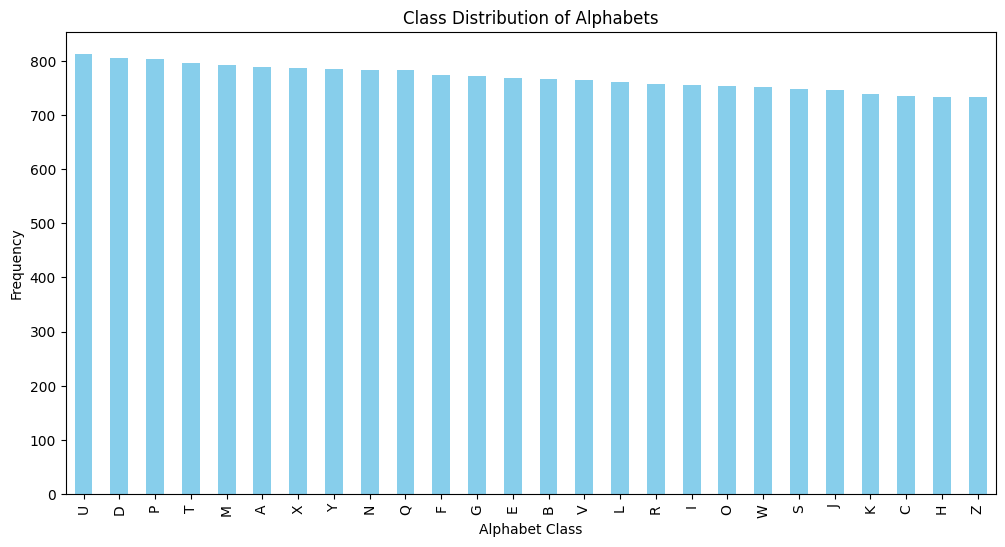

In [9]:
plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title("Class Distribution of Alphabets")
plt.xlabel("Alphabet Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Step 4: Preprocess the Data

In [10]:
features = data.drop(columns=['letter'])

In [11]:
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

In [13]:
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(data['letter'])

In [14]:
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)

In [15]:
processed_data = features_normalized.copy()
processed_data['letter_encoded'] = target

In [16]:
processed_data.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter_encoded
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,19
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,8
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,3
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,13
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,6


In [ ]:
# Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = features_normalized
y = target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (16000, 16)
Test set size: (4000, 16)


In [25]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.68.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using ca

DEPRECATION: Loading egg at c:\users\sanjith\appdata\local\programs\python\python312\lib\site-packages\ppscore-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.2.2 which is incompatible.


# Import Required Libraries

In [26]:
import tensorflow as tf

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Prepare the Data for the Neural Network

In [28]:
# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [29]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")


X_train shape: (16000, 16)
y_train_encoded shape: (16000, 26)


# Define the Neural Network

In [30]:
model = Sequential()

In [31]:
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.add(Dense(units=64, activation='relu'))

In [33]:
model.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,938 (27.10 KB)

 Trainable params: 6,938 (27.10 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [36]:
history = model.fit(X_train, y_train_encoded, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2084 - loss: 2.9337 - val_accuracy: 0.5163 - val_loss: 1.8224
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5493 - loss: 1.6360 - val_accuracy: 0.5938 - val_loss: 1.4304
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6281 - loss: 1.3326 - val_accuracy: 0.6463 - val_loss: 1.2567
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6690 - loss: 1.1961 - val_accuracy: 0.6744 - val_loss: 1.1728
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6971 - loss: 1.1015 - val_accuracy: 0.7119 - val_loss: 1.1049
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7177 - loss: 1.0282 - val_accuracy: 0.7144 - val_loss: 1.0470
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7179 - loss: 0.9994 - val_accuracy: 0.7281 - val_loss: 1.0001
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7390 - loss: 0.9551 - val_accuracy: 0.

# Evaluate the Model

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

In [38]:
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

Test Accuracy: 0.82
Test Loss: 0.64


# Visualize Training Results

In [39]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

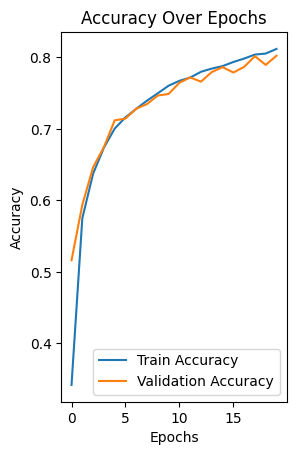

In [40]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

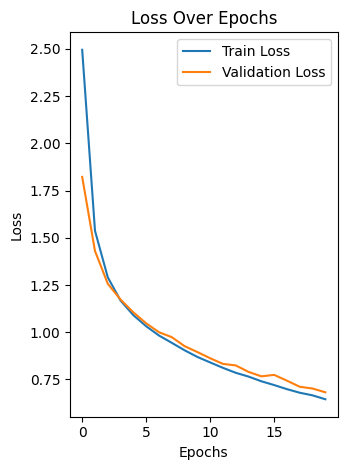

In [43]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
model.save("ARTIFICIAL NEURAL NETWORKS.keras")

In [48]:
import hashlib

In [50]:
data = "example"
encoded_data = data.encode('utf-8')
hash_object = hashlib.sha256(encoded_data)
hash_object = hash_object.hexdigest()


In [51]:
detected_encoding = 'ISO-8859-1'  # Replace with the actual encoding detected
file_path = r"C:\Users\Sanjith\Desktop\Assignment 17\ARTIFICIAL NEURAL NETWORKS.keras"
output_path = r"C:\Users\Sanjith\Desktop\Assignment 17\ARTIFICIAL NEURAL NETWORKS_UTF8.keras"

with open(file_path, 'r', encoding=detected_encoding) as source_file:
    content = source_file.read()

with open(output_path, 'w', encoding='utf-8') as target_file:
    target_file.write(content)